In [94]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use("../matplotlib_style/standard_plot_style.mplstyle")

import qutip

%matplotlib inline

save_figures = False
save_path    = "/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/Figs/Theory"

sys.path.append("../utils")


In [2]:
from scipy.stats import norm



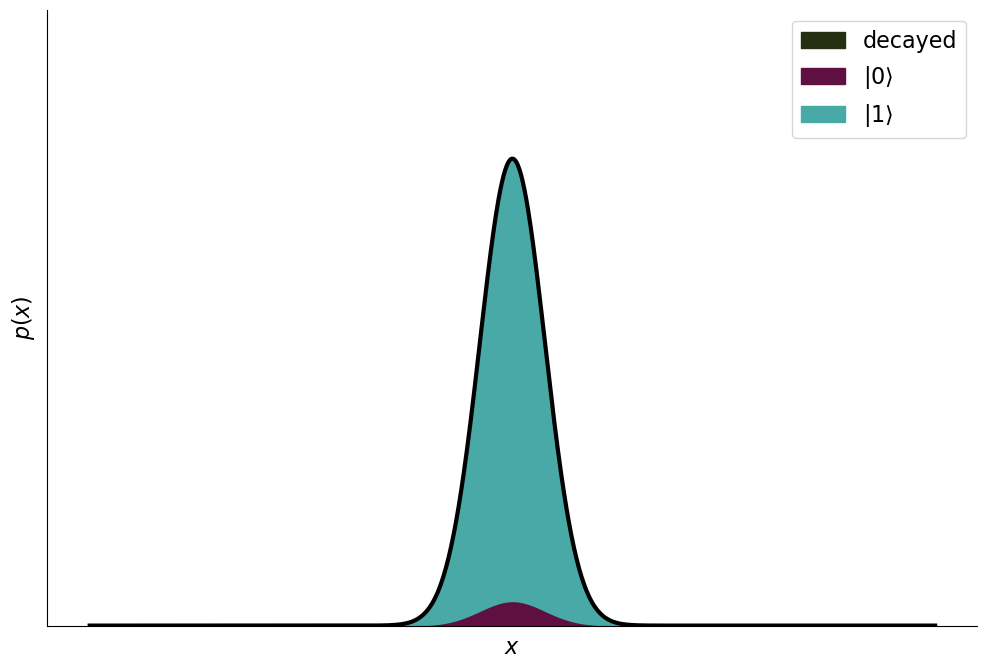

In [89]:
xs = np.linspace(-13, 13, 1000)

fig, ax = plt.subplots()

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")

ax.set_ylim(0, 0.5)

def dragged_gauss(r):
    return (norm.cdf(r, xs, 1) - norm.cdf(-r, xs, 1))  / 2  / r

x0 = 0
x1 = 0

f0_start      = 0.10
f1_start      = 0.90
f_decay_start = 0.00

dist_0 = f0 * norm.pdf(xs, x0, 1)
dist_1 = f1 * norm.pdf(xs, x1, 1)
dist_decay = np.zeros_like(dist_0) # f_decay * dragged_gauss(x1 - x0)

patch_dec = ax.fill_between(xs, dist_decay, label= r"decayed", color = "C2")
patch_0   = ax.fill_between(xs, dist_decay, dist_decay + dist_0, label= r"$|0\rangle$", color = "C0")
patch_1   = ax.fill_between(xs, dist_0 + dist_decay, dist_0 + dist_decay + dist_1, label= r"$|1\rangle$", color = "C1")

pdf = ax.plot(xs, dist_0 + dist_decay + dist_1, linewidth = 3, color = "black")

decay_time = 10

ax.legend(loc = "upper right")

def update(frame):
    ax.cla()
    ax.set_ylim(0, 0.5)

    x0 = - frame
    x1 = frame

    f0 = f0_start
    f1 = np.exp(- frame / decay_time) * f1_start
    f_decay = 1 - f0 - f1

    dist_0 = f0 * norm.pdf(xs, x0, 1)
    dist_1 = f1 * norm.pdf(xs, x1, 1)
    dist_decay = f_decay * dragged_gauss(frame)

    patch_dec = ax.fill_between(xs, dist_decay, label= r"decayed", color = "C4")
    patch_0   = ax.fill_between(xs, dist_decay, dist_decay + dist_0, label= r"$|0\rangle$", color = "C0")
    patch_1   = ax.fill_between(xs, dist_0 + dist_decay, dist_0 + dist_decay + dist_1, label= r"$|1\rangle$", color = "C1")
    
    pdf = ax.plot(xs, dist_0 + dist_decay + dist_1, linewidth = 3, color = "black")

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")

    ax.legend()


from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, update, frames=np.linspace(0.01, 10, 150), interval=1000 / 30)

In [95]:
update(5)
fig.savefig(save_path + "/Distributions.png", dpi = 300)

In [96]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [97]:
anim.save(save_path + "/Distributions.mp4", fps=30, extra_args=['-vcodec', 'libx264'])